# tensorflow
 tensorflow는 일반적인 개발 방식과 많이 상이하다. 이러한 tensorflow의 개발 방식을 체득하고 실습해보자. 내용의 대한 요약과 실습 코드로 구성한다.
 - - -

# 상수형, Constant
 tensorflow에서 상수를 저장하기 위한 데이터 형식이다.
 - tf.constant(value, dtype=None, shape=None, name='Const', verify_shape=False)
  - value : 상수의 값
  - dtype : 상수의 데이터형
  - shape : 행렬의 차원을 정의
  - name : name은 말 그래도 이름

In [9]:
import tensorflow as tf

a = tf.constant([5],dtype=tf.float32)
b = tf.constant([10],dtype=tf.float32)
c = tf.constant([2],dtype=tf.float32)

d = a*b+c
print(d)
print(5*10+2)

Tensor("add_8:0", shape=(1,), dtype=float32)
52


- - -
# 그래프, 세션
 위에서 보다싶이 d라는 constant 변수를 출력했을 때 값이 출력되는 것이 아닌 Tensor가 출력된다. tensor는 그냥 하나하나의 데이터라 생각하면 편하다. 여기서의 d가 따라서 그래프라 생각하면 된다. a*b+c가 하나의 그래프. 그리고 이 그래프를 실행시켜주는 것이 session이다. 아래의 그림은 그래프를 시각화한 내용이다.
 <br>
 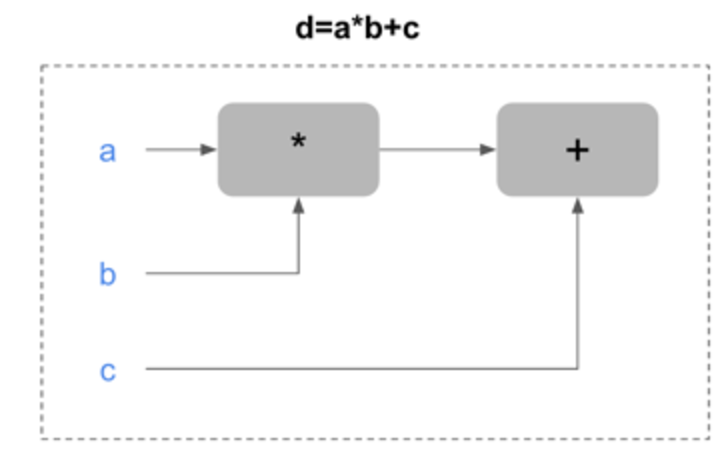

In [10]:
import tensorflow as tf

a = tf.constant([5],dtype=tf.float32)
b = tf.constant([10],dtype=tf.float32)
c = tf.constant([2],dtype=tf.float32)

d = a*b+c

# Session 추가
sess = tf.Session()
result = sess.run(d)
print(result)

[52.]


- - -
# 플레이스 홀더, Placeholder
 플레이스 홀더는 임시 저장소라 생각하면 된다. input 데이터를 받아두거나 중간 계산값을 저장하는 것이다. GPU 연산시 파이썬 외부에서 계산하고 내부로 다시 가져오고, 내부에서 다시 외부로 가져가는 것에 대해 굉장히 큰 cost가 존재한다. 이를 해결하기 위하여 Placeholder를 도입하여 파이썬 외부(tensorflow 라이브러리)에 저장소를 따로 만든다고 이해하였다.
 - tf.placeholder(dtype,shape,name) 
  - dtype : 데이터 타입
  - shape : 행렬의 차원
  - name : placeholder의 이름

In [11]:
import tensorflow as tf

input_data = [1,2,3,4,5]

# placeholder 초기화
x = tf.placeholder(dtype=tf.float32)
y = x * 2

sess = tf.Session()
# placeholder에 값을 넣어주는 것(이를 feeding이라 한다.)
result = sess.run(y,feed_dict={x:input_data})

print(result)

[ 2.  4.  6.  8. 10.]


위의 코드를 보면 y 값을 구하고자 하지만 x 변수를 알아야한다. 즉 x를 placeholder로 설정하여 matrix를 넣어줘 result를 얻어주는 과정이다.

- - -
# 변수형, Variable
y = W*x + b; 이 경우 x가 입력데이터, W, b가 학습을 통하여 구해야하는 값이다. 즉 학습을 통하여 구해야 하는 값이 변수이며 변수형으로 사용된다.
 - tf.Variable.__init__(initial_value=None, trainable=True, collections=None, validate_shape=True, caching_device=None, name=None, variable_def=None, dtype=None, expected_shape=None, import_scope=None)
<br>조금 복잡하다.. 차차 알아가보고 예제를 한번 보겠다.

In [16]:
import tensorflow as tf

input_data = [1,2,3,4,5]

# x는 입력 데이터, placeholder
x = tf.placeholder(dtype=tf.float32)
# W는 학습을 구해야하는 변수
W = tf.Variable([2],dtype=tf.float32)
y = W*x

sess = tf.Session()

# 초기화, 반드시 초기화를 해주어야 한다!!
init = tf.global_variables_initializer()
sess.run(init)

# y를 구해주는 run이다.
result = sess.run(y,feed_dict={x:input_data})

print(result)

[ 2.  4.  6.  8. 10.]


 결과적으로는 W에 initialize했던 2와 x(input_data)가 곱해져서 result값을 구해주었다.
 <br>이를 곰곰히 생각해봤을때, 이런 단순한 계산값은 상수를 사용해도 되겠지만, 만약 정말 학습모델을 사용한다면 상수는 값을 변환시킬수 없지만 변수는 변환시키며 학습할 수 있기 때문에 변수가 반드시 필요할 것이다.
 <br>위는 그냥 예제로써 사용한 것 뿐... 나중에 학습시킬때 다시 확인해보자
 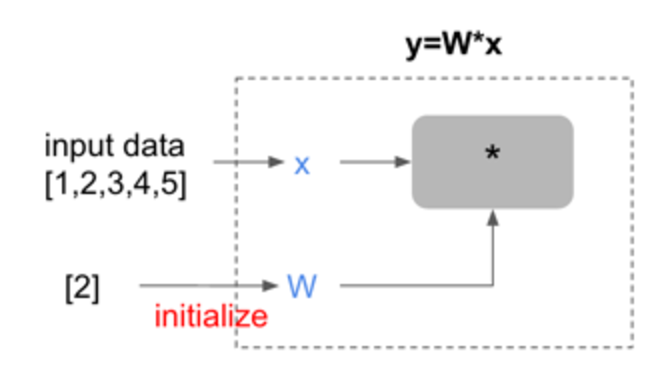

- - -
### 중요 키워드
1. Constant
2. placeholder
2. 그래프
3. 세션
4. Variable